### Tipologia i cicle de vida de les dades

# Práctica 1: Web Scraping.

## 1. Context. 

Ens trobem en un context de pandemia on les dades juguen un paper clau per tal de controlar la seva expansió. Existeixen un nombre molt gran de bases de dades on es recullen dades a diversos nivells al respecte. L'evolució de la pandema s'ha mesurat per ciutat, per estat, o per cada país; per hores, per dies, o per setmanes. En les dades que volem analitzar a continuació hi trobarem el nombre de casos i el nombre de víctimes reportats a la WHO durant la darrera quinzena. En aquesta práctica de **web scraping** volem extreure les dades que provenen de la pàgina web [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/), concretament de la situació de la pandemia covid-19 als últims dies a tot el món, taula que trobem en aquest [enllaç](https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases). Després desem el resultat en un fitxer CSV. Aplicarem els coneixements adquirits en el bloc 2 teòric sobre *Web Scraping* fent servir el llenguatge de programació *python*.



## 2. Definir el títol pel dataset.

Per aquest dataset hem decidit posar-li de títol covid_notification_world_cases_dataset. Així doncs el fitxer resultant de dades s'anomenarà covid_notification_world_cases_dataset.csv. 

## 3. Descripció del dataset.

Tal com hem definit amb el títol, el dataset conté la informació dels últims casos confirmats i morts de Covid-19 en les diferents regions i països del món notificats en els últims 14 dies. Aquestes dades es mostren per cada país de cada regió del món. El dataset a part de tots els països del món conté un camp extra anomenat 'Other' que conté les dades dels casos de transmissió Internacional de Japó. Les dades en aquest cas ja es troben preparades per la utilització. El dataset es guarda en un objecte de Python, DataFrame de la llibreria Pandas, per tal de poder realitzar les visualitzacions més tard i per tal de poder exportar el dataset en un CSV.

## 4. Representació gràfica.

Per veure com és el dataset i la informació que conté crearem diverses representacions. Primer de tot mostrarem el contingut final del dataset obtingut després d'extreure la informació.

In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('./src/')
from scrapper import WebScrapper

# Create class
webScrapper = WebScrapper()
# Get dataframe that contains dataset
df = webScrapper.get_data()
df["Sum of Cases"] = df["Sum of Cases"].astype(str).astype(int)
df["Sum of Deaths"] = df["Sum of Deaths"].astype(str).astype(int)
df["Confirmed cases during 14-days period"] = df["Confirmed cases during 14-days period"].astype(str).astype(int)
# Show first rows
df.head()

,Region,Country,Sum of Cases,Sum of Deaths,Confirmed cases during 14-days period
0,Africa,Algeria,124265,3036,11173
1,Africa,Angola,21380,521,573
2,Africa,Benin,6501,81,867
3,Africa,Botswana,35009,447,6628
4,Africa,Burkina_Faso,12378,144,396


Com podem veure, hem mostrat les primeres files amb la informació que conté el dataset per tal de veure les dades que s'estan guardant. A continuació realitzarem una visualització amb gràfics per tal d'entendre millor els valors de les dades.

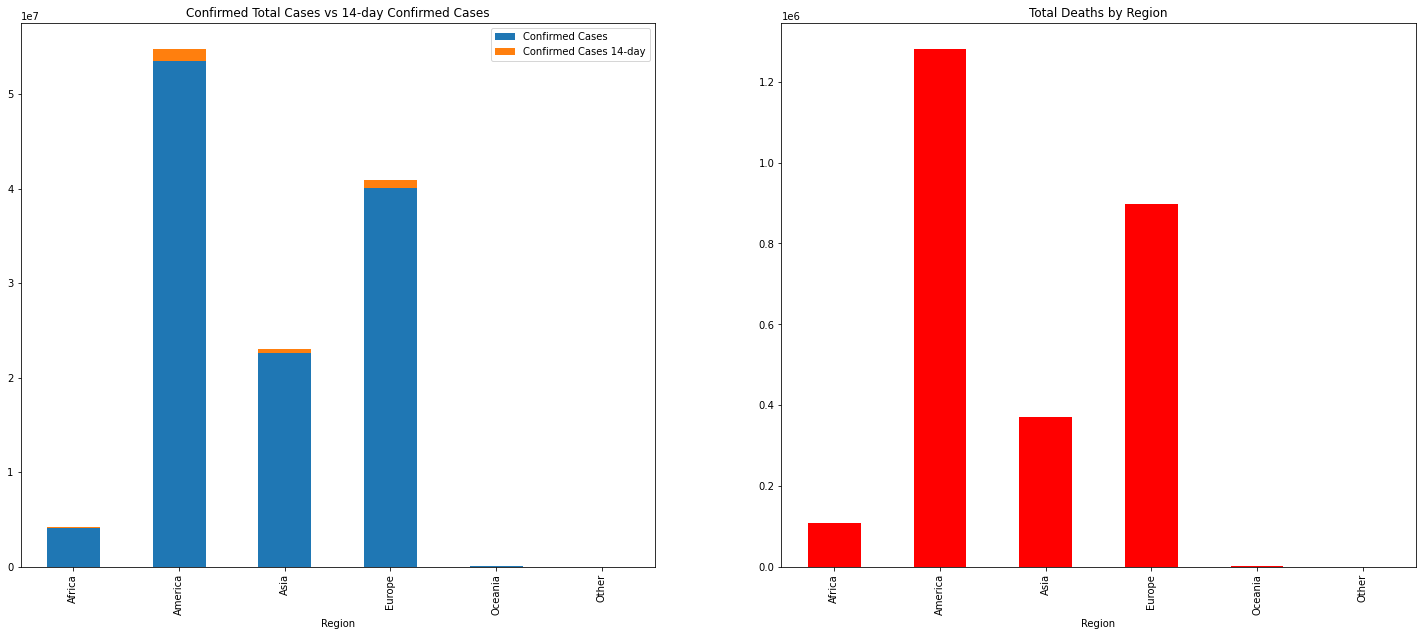

In [2]:
import pandas as pd
dd = pd.DataFrame({'Confirmed Cases': df.groupby('Region')["Sum of Cases"].sum(), 'Confirmed Cases 14-day': df.groupby('Region')["Sum of Deaths"].sum()})
fig = plt.figure(figsize=(25,10)) 
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
dd.plot.bar(stacked=True, ax = ax, title= 'Confirmed Total Cases vs 14-day Confirmed Cases')
df.groupby('Region')["Sum of Deaths"].sum().plot.bar(ax = ax1, color = 'red', title= 'Total Deaths by Region')
plt.show()

Partint de les dades que tenim, hem generat dos gràfics per visualitzar una mica millor les dades. En el primer podem veure com es mostra el total de casos confirmats per regió juntament amb els casos confirmats per regió en els últims 14 dies. D'aquesta forma tenim una visualització de com és l'augment dels casos dels últims 14 dies respecte al total de casos confirmats.
L'altre gràfic creat ens mostra una representació de les morts confirmades en cada regió. D'aquesta forma, utilitzant els dos gràfics, podem extreure informació sobre cada regió i la seva situació.

## 5. Contingut.

Dintre del dataset tenim els següents camps:

* <b>Region</b>: indica la regió a la qual pertany l'element, en aquest cas, el país.
* <b>Country</b>: nom del país.
* <b>Sum of Cases</b>: el nombre total de casos confirmats de Covid-19 en el país.
* <b>Sum of Deaths</b>: el nombre total de morts provocades pel Covid-19 en el país.
* <b>Confirmed cases during 14-days period</b>: el nombre total de casos confirmats de Covid-19 en el país en els últims 14 dies.

Cada setmana, entre dilluns i dimecres, un equip d’epidemiòlegs analitza fins a 500 fonts rellevants per recollir les darreres xifres sobre el nombre de casos i defuncions de COVID-19 que es publicaran dijous a tot el món. El seguiment de les dades és seguit del procés d’intel·ligència epidèmica estàndard d’ECDC per al qual cada entrada de dades es valida i es documenta en una base de dades ECDC. Un extracte d’aquesta base de dades, completat amb xifres i visualitzacions de dades actualitzades, es comparteix al lloc web de l’ECDC per garantir un màxim nivell de transparència.

Per tal d'extreure les dades hem hagut d'analitzar el lloc web per trobar els elements necessaris per obtenir les dades. Partint d'aquest punt, vam inspeccionar el lloc web i vam buscar la taula amb les dades dintre dels elements HTML del lloc. Un cop ja tenim l'identificador de la taula i l'estructura que té, utilitzant la llibreria BeautifulSoup, vam obtenir la taula i vam fer una cerca per cada un dels elements que conté la taula, en aquest cas cada una de les files que conté la taula. Finalment per a cada fila vam obtenir els diferents camps explicats anteriorment i vam guardar la informació.


## 6. Agraïments.

Les dades s'han recopilat de la plana web [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/). S'ha utilitzat el llenguatge python i s'han aplicat tècniques de **web scraping** per a extreure les dades guardades en fitxers *HTML*.

## 7. Inspiració.

Amb aquest conjunt de dades podem respondre preguntes relacionades amb l'evolució de la pandemia a nivell global. Podem veure en cada període de catorze dies quants casos hi han hagut i comparar-los amb les dades anteriors per veure quina és la tendencia. Un possible ús seria l'evaluació de les mesures preventives contra l'expansió del virus. Si amb certes mesures es veu una reducció consistent, podem preveure l'estat de la pandemia en el futur i per tant planificar modificacions en les mesures establertes. Es necessita temps per tal de poder coordinar a tots els implicats en aquests procediments, hi intervenen molts factors i l'organització és complexa. Les dades permeten planificar amb criteri i executar els plans de manera efectiva.

Permet elaborar un informe quinzenal de l'estat de la pandemia en tots els països. Això ajudaria a països que no tinguin una evolució favorable demanar ajuda per implementar mesures més efectives que estiguin funcionant en altres llocs.


## 8. Llincència.

Dades publicades sota la llicència **CC BY-SA 4.0 ES** amb la qual qui utilitzi aquestes dades és lliure de:

- Compartir: copiar i redistribuir el material en qualsevol mitjà o format.
- Adaptar: Transformar i crear a partir del material original per a qualsevol finalitat.

Sota les condicions següents:

- Reconeixement: S'ha de reconeixer adequadament l'autoria, proporcionar un enllaç a la llicència i indicar si s'han realitzat canvis. Es pot fer de qualsevol manera raonable sempre i quan no es suggereixi que es té cap recolzament per part del llicenciador o que el rep per l'ús que en fa.

- CompartirIgual: Si ho modifica o transforma o crea a partir del material, ha de difondre les seves contribucions sota la mateixa llicència que l'original.

- No hi ha restriccions adicionals. No es pot aplicar cap terme legal o mesures tecnològiques que legalment restringeixin realitzar allò que la llicència permet.

## 9. Contribucions al treball.

| Contribucions | Accuracy |
| --- | --- |
| Recerca prèvia | M.R./ M.F. |
| Redacció de les respostes | M.R./ M.F. |
| Desenvolupament codi  | M.R./ M.F. |